In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1. Planck's Law for spectral radiance



$$B(x) = \frac{x^3}{e^x -1}$$

For total radiance we integrate it over $0$ to $\infty$.

The limit is well defined at $0$ and thus we can easily ignore this point upto some precision

In [2]:
def bode(n,a,b,f):
    '''
    Parameters
    ----------
    n : int
        number of points
    a : float
        lower limit of integration
    b : float
        upper limit of integration
    f : function
        function to be integrated
        
    Returns
    ---------
    returns the integral of the function from a to b using the boole's rule
    '''
    n = 4*(n//4) + 1
    h = np.abs(b-a)/(n-1)
    x = np.arange(a,b+h/2,h)
    y = f(x)
    integral = 7*y[0] + 7*y[-1] +32*sum(y[1:-1:2]) + 12*sum(y[2:-2:4]) + 14 *sum(y[4:-4:4])
    integral = integral*(2*h)/45

    return integral

In [3]:
def spec_rad(x):
    y = x**3 /(np.exp(x)-1)
    return y

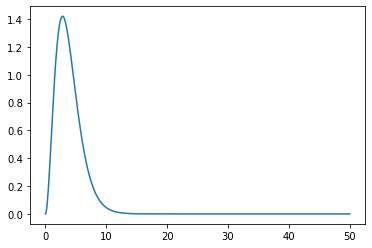

In [4]:
xval = np.linspace(0.000001,50, 500)
sp = spec_rad(xval)
plt.plot(xval, sp)

In [5]:
X_M = 30# x_max as defined in the problem
x0 = 1e-6 # lower limit of integration
x1 = X_M # upper limit of integration
ACT = (np.pi**4)/15 # actual value of integral

N = [20,100,400,1000,1600, 2000]

BT =  np.array([bode(i,x0,x1, f=spec_rad) for i in N])
errBT = abs(BT - ACT)
# print(f"{spec_rad(X_M):.20f}")

In [6]:
# checking errors in Boole's rule with different number of steps
# The Numerical Result is reported with the error wit
s = f"N "+4*" " +"Bode" + 20*" " + "Error \n"
for i in range(0, len(N)):
    s = s + f"{N[i]+1:4d}{BT[i]:20.16f}{errBT[i]:16.12f}\n"
print(s)

N     Bode                    Error 
  21  6.5412877080940541  0.047348305827
 101  6.4939393994720360  0.000000002795
 401  6.4939393994702099  0.000000002797
1001  6.4939393994702073  0.000000002797
1601  6.4939393994702161  0.000000002797
2001  6.4939393994702153  0.000000002797



Our finest strip width is given by $N=2001$ number of lines which gives $2000$ divisions. The values is
$$\text{Result} = 6.4939393994702153$$
$$\text{Error} = 0.000000002797$$

The error is quite small and we can see that the largest part of the error contribution comes from the setting $x_{max}$ to be some finite value

# Q2. Lennard Jones potential

The lennard jones potential is given by 
$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left( \frac{\sigma}{r}\right)^6\right]$$

We want to find the equlibrium bond distance where $F(r) = -\frac{dV}{dr} = 0$


$$F(r) = 4\epsilon \left[ 12\left(\frac{\sigma^{12}}{r^{13}}\right) - 6 \left( \frac{\sigma^6}{r^7}\right)\right]$$

We set $\epsilon = 1$ and $\sigma =1$

In [7]:
SIGMA = 1
EPS = 1

def len_pot(r):
    f = 12* ((pow(SIGMA,12))/(pow(r,13))) - 6*(pow(SIGMA,6)/(pow(r,7)))
    return f


In [8]:
def bisection(a,b,f,tol,maxiter):
    '''
        Parameters
        ----------
        a : float
            left guess
        b : float
            right guess
        f : function
            function whose roots need to be calculated
        tol : float
            error tolerance
        maxiter : int
                maximum number of iterations
        Returns
        ---------
        returns a root between 'a' and 'b' using the bisection method
    '''
    c = (a+b)/2
    err = abs(f(c))
    print("%1s %10s %10s %10s %10s"%("n", "a","b","c","f(c)"))
    count = 0
    if abs(f(a))<=tol:
        return a
    elif abs(f(b))<=tol:
        return b
    if f(a)*f(b)>0:
        print("Error")
        return None
    while err > tol:
        c = (a+b)/2 # taking a midpoint
        fa = f(a)
        fb = f(b)
        fc = f(c)
        print("%2d %10.6f %10.6f %10.6f %10.6f"%(count,a,b,c,fc))
        if fa*fc<0:# conditions
            b=c
        elif fc*fb<0:
            a=c
        elif abs(fc)<=tol:
            return c
        count+=1
        err = abs(fc)# error in numerical estimation
        if count ==maxiter:
            print("Did not converge")
            return None
    print("The root is ",c)
    return c

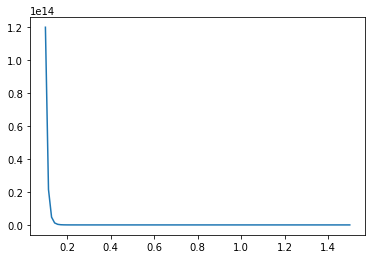

In [9]:
rval = np.linspace(0.1,1.5,100)
lp = len_pot(rval)
plt.plot(rval, lp)

In [31]:
g0 = 1# left guess for the root
g1 = 2#right guess for the root
tol = 1e-10
maxiter = 100
root = bisection(g0,g1,len_pot,tol,maxiter)

n          a          b          c       f(c)
 0   1.000000   2.000000   1.500000  -0.289507
 1   1.000000   1.500000   1.250000  -0.598584
 2   1.000000   1.250000   1.125000  -0.035409
 3   1.000000   1.125000   1.062500   1.531304
 4   1.062500   1.125000   1.093750   0.538991
 5   1.093750   1.125000   1.109375   0.211513
 6   1.109375   1.125000   1.117188   0.079179
 7   1.117188   1.125000   1.121094   0.019800
 8   1.121094   1.125000   1.123047  -0.008310
 9   1.121094   1.123047   1.122070   0.005617
10   1.122070   1.123047   1.122559  -0.001378
11   1.122070   1.122559   1.122314   0.002112
12   1.122314   1.122559   1.122437   0.000365
13   1.122437   1.122559   1.122498  -0.000507
14   1.122437   1.122498   1.122467  -0.000071
15   1.122437   1.122467   1.122452   0.000147
16   1.122452   1.122467   1.122459   0.000038
17   1.122459   1.122467   1.122463  -0.000017
18   1.122459   1.122463   1.122461   0.000010
19   1.122461   1.122463   1.122462  -0.000003
20   1.122461 

In [11]:
actual_root = pow(2,1/6)
err_root = abs(root - actual_root)
print("The Converged value of the root is -->  ",root)
print("The analytical value of the root is --> ",actual_root)
print("The error between these two is here --> ", err_root)


The Converged value of the root is -->   1.1224620483117178
The analytical value of the root is -->  1.122462048309373
The error between these two is here -->  2.3447910280083306e-12


# Q3. Velocity Verlet with gravitational forces

$$\frac{d\vec{r}}{dt} = \vec{a}(\vec{r}) = \vec{F}(\vec{r})/m = -\frac{GM}{r^2} \hat{r}$$

The accelerations in the x and y directions are given as

$$ \frac{d^2x}{dt^2} = a_x = -\frac{GM}{r^2} \cos(\arctan(y/x))$$
$$ \frac{d^2y}{dt^2} = a_y = -\frac{GM}{r^2} \sin(\arctan(y/x))$$


**Note** : Velocity verlet algorithms are only defined for dynamical systems of the form $\frac{d^2r}{dt^2} = F(r)$. So the algorithm doesn't require decomposition into 4 first order ODE's to solve. However here are the decoupled ODEs.

$$
\begin{aligned}[t]
\frac{dx}{dt} &= v_x\\
\frac{dv_x}{dt} &= -\frac{GM}{(x^2+y^2)} \cos(\arctan(y/x))\\
\frac{dy}{dt} &= v_y\\
\frac{dv_y}{dt} &= -\frac{GM}{(x^2+y^2)} \sin(\arctan(y/x))
\end{aligned}
$$

In [30]:
# Defining constants
GM = 1
M = 5

def accln(t,r):
    x = r[0]
    y = r[1]
    rsq = x**2 + y**2
    
    # np.atan2 gives you an signed value as return
    # np.atan2 has range [-pi,pi]
    # so we shift the range to [0, 2pi]
    theta = np.arctan2(y,x)
    if theta<0:
        theta = 2*np.pi + theta

    ax = -GM/rsq * np.cos(theta) 
    ay = -GM/rsq * np.sin(theta)
    a = np.asarray([ax,ay])
    
    return a

In [13]:
def vel_vlt(yn, vn, x, h , f):
    '''
    Parameters
    ----------
    yn : float
        initial value at (n) time step
    vn : float
        initial value of velocity at (n) time step
    x : float
        initial value of independent variable
    h : float
        step size
    f : function
        the function on the right hand side of the differential equation
        
    Returns
    ---------
    returns the value of y at the next time step using the Velocity-Verlet  or Stormer Verlet method.
    '''
    ynp1 = yn + vn*h + 0.5*f(x, yn)*(h**2)
    vnp1 = vn + 0.5*(f(x, yn) + f(x + h, ynp1))*h
    return ynp1, vnp1
def call_vvlt(meth,a,b,N,y0,v0, f):
    
    '''
    Parameters
    ----------
    meth : function
        the numerical method to be used
        vel_vlt for Velocity-Verlet method
        leapfrg for Leapfrog method
    a : float
        start time for differential equation solver
    b : float
        end time for differential equation solver
    N : int
        number of strips for discretization
    y0 : float
        initial value of differential equation solution
    f : function
        the function on the right hand side of the differential equation
    
    Returns
    ---------
    returns the value of y at each time step using the velocity verlet method.
        
    '''
    h = (b-a)/(N-1)
    ys = np.zeros((N, len(y0)))
    xs = np.arange(a,b+h/2,h)
    vs = np.zeros((N, len(v0)))
    y,ys[0] = y0,y0
    x0 = xs[0]
    v,vs[0] = v0,v0
    for i in range(N):
        ys[i,:] = y # to allow for vector solutions
        vs[i,:] = v # to allow for vector solutions
        [y,v] = meth(ys[i], vs[i],xs[i],h,f)
    return ys, vs

In [14]:
a = 0 # t_initial 
b = 30 # t final
h = 0.01 # time step
Num = int(1+ (b-a)/h)
xval = np.arange(a,b+h/2,h)
y_ini = np.asarray([1.0, 0.0])  # Initial condition
v_ini = np.asarray([0.0, 1.0]) # Inital Velocity condition

In [15]:
[y_vvlt, p_vvlt] = call_vvlt(vel_vlt,a,b,Num,y_ini,v_ini, accln) 
# y_vvlt contains both x and y data
# p_vvlt contains both v_x and v_y data

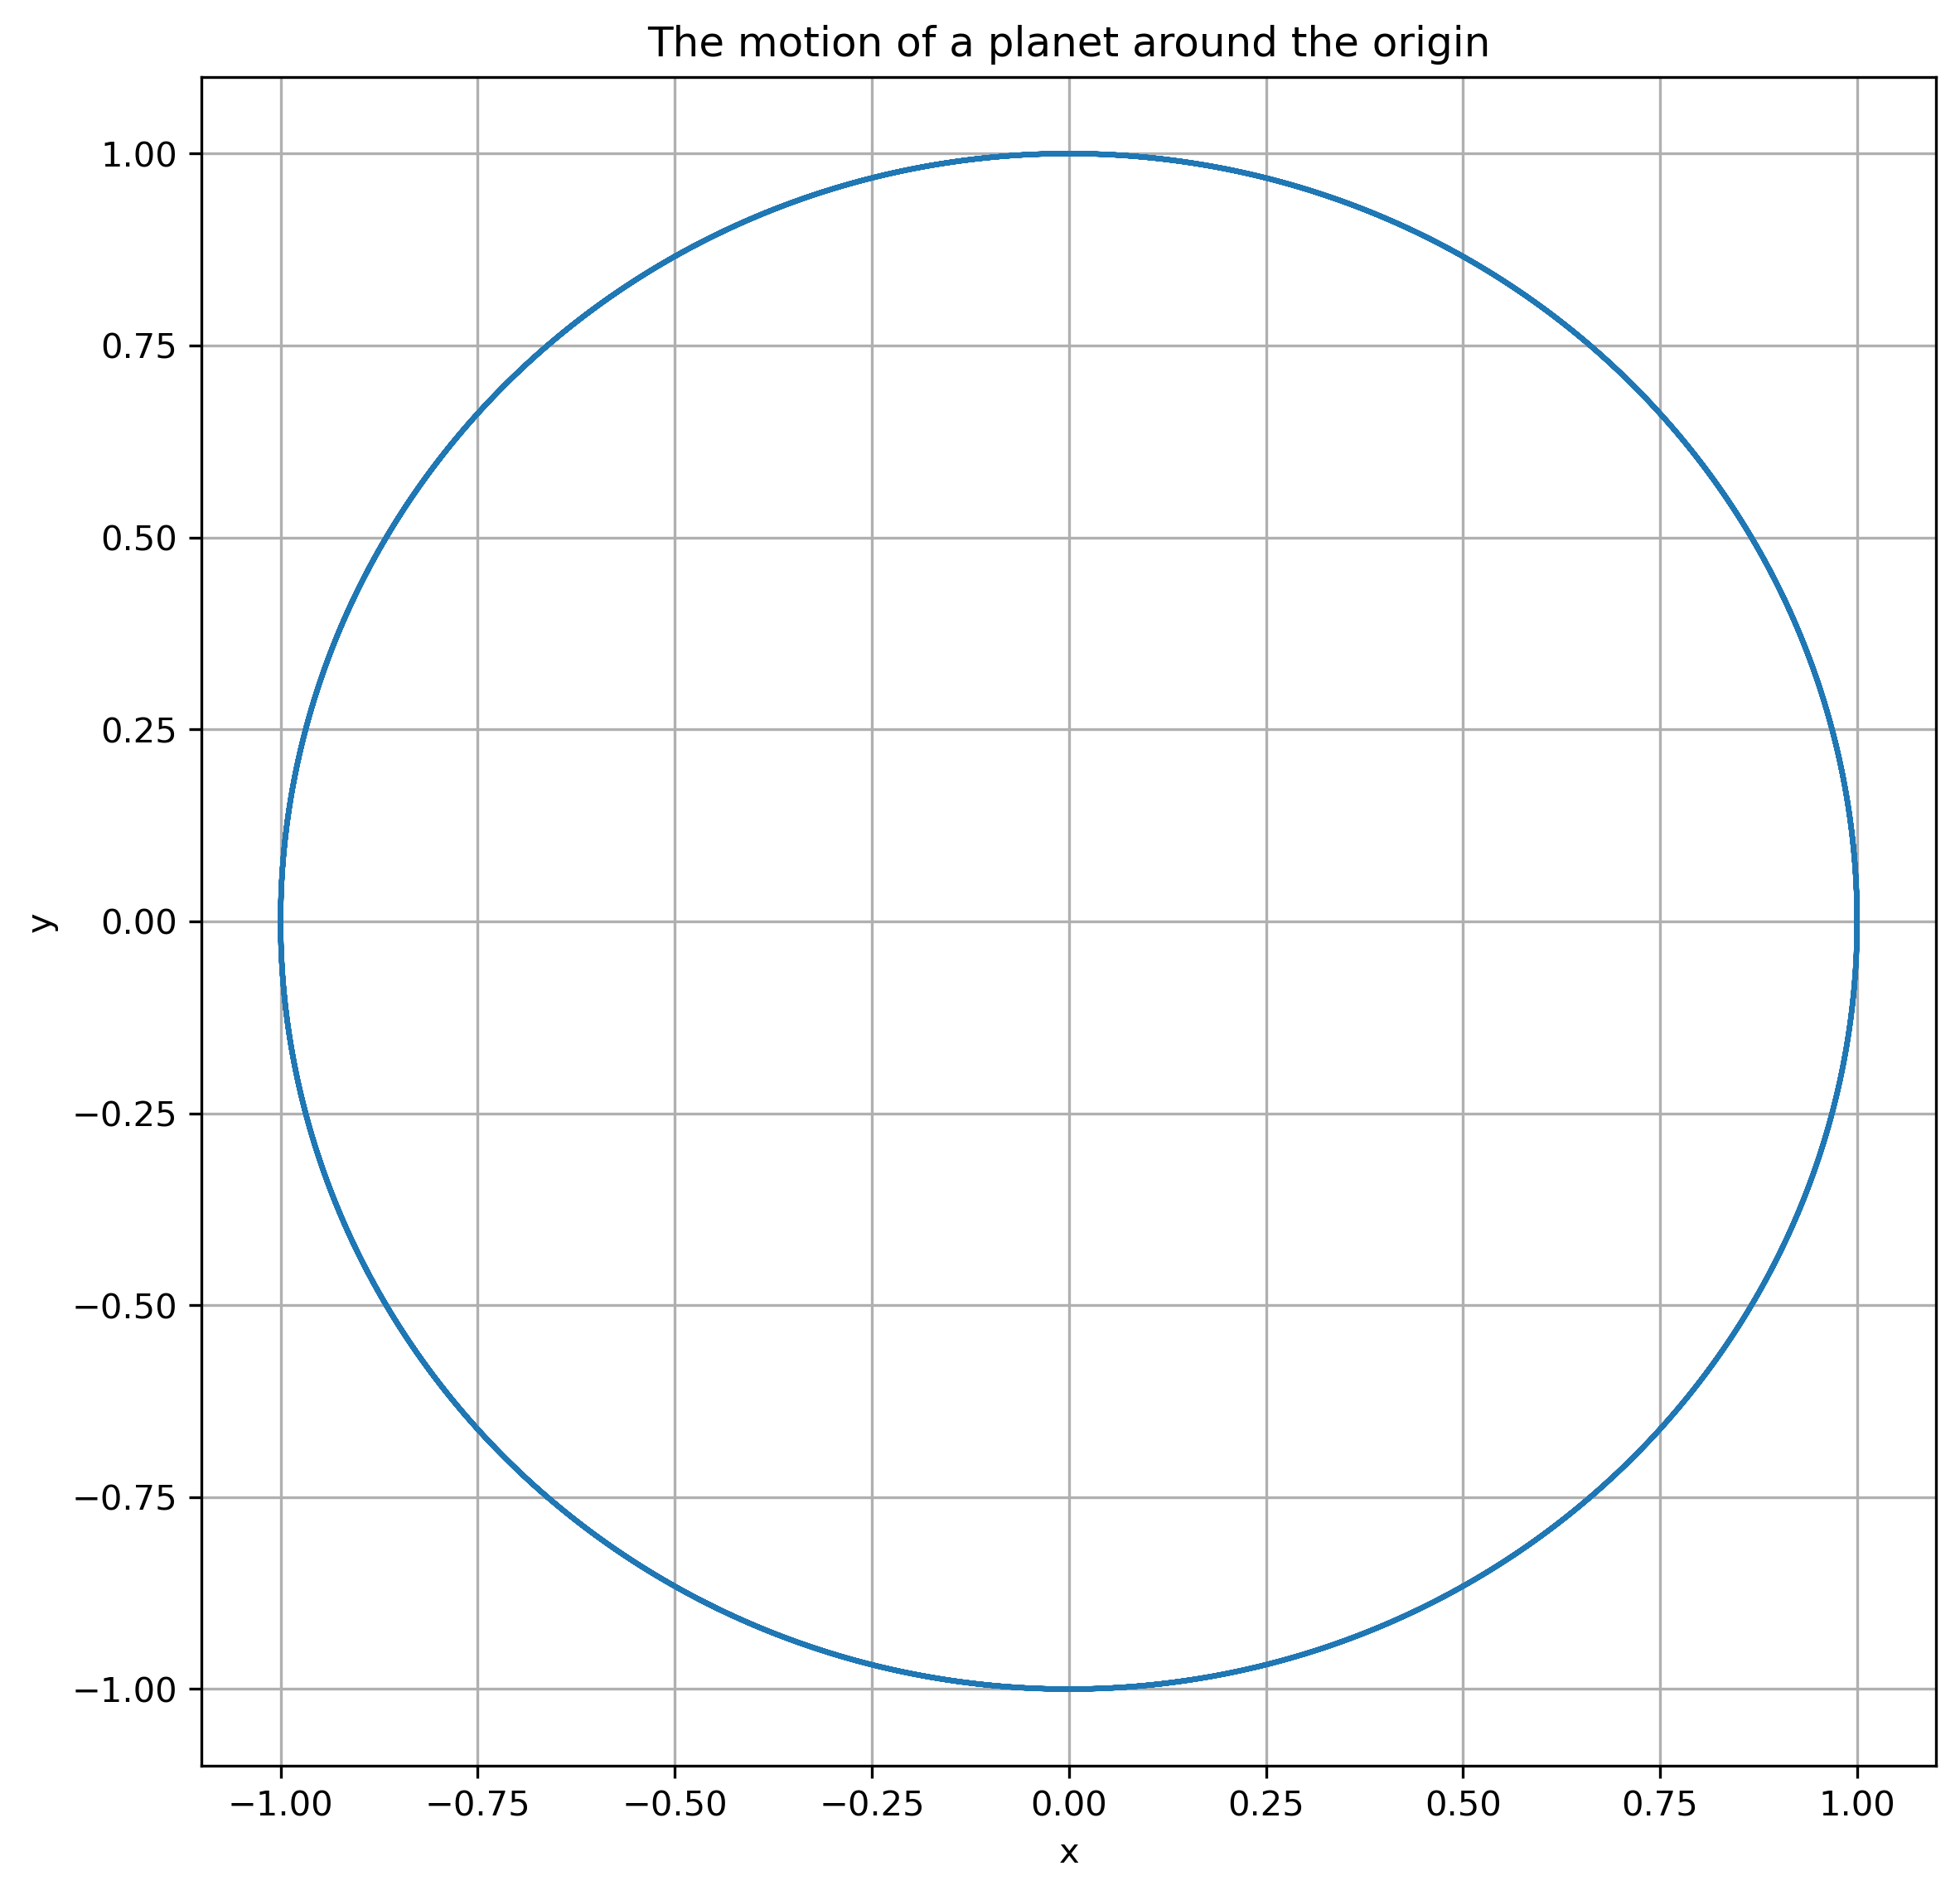

In [16]:
plt.figure(figsize=(9,9), dpi = 300)
plt.plot(y_vvlt[:,0], y_vvlt[:,1])
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("The motion of a planet around the origin");

In [17]:
def Energy(x,y,vx,vy,M):
    vsq =  vx**2 + vy**2
    r = np.sqrt(x**2 + y**2)
    E = 0.5 * M * vsq - GM * M/r
    return E

In [18]:
eng = Energy(y_vvlt[:,0], y_vvlt[:,1], p_vvlt[:,0], p_vvlt[:,1],M)

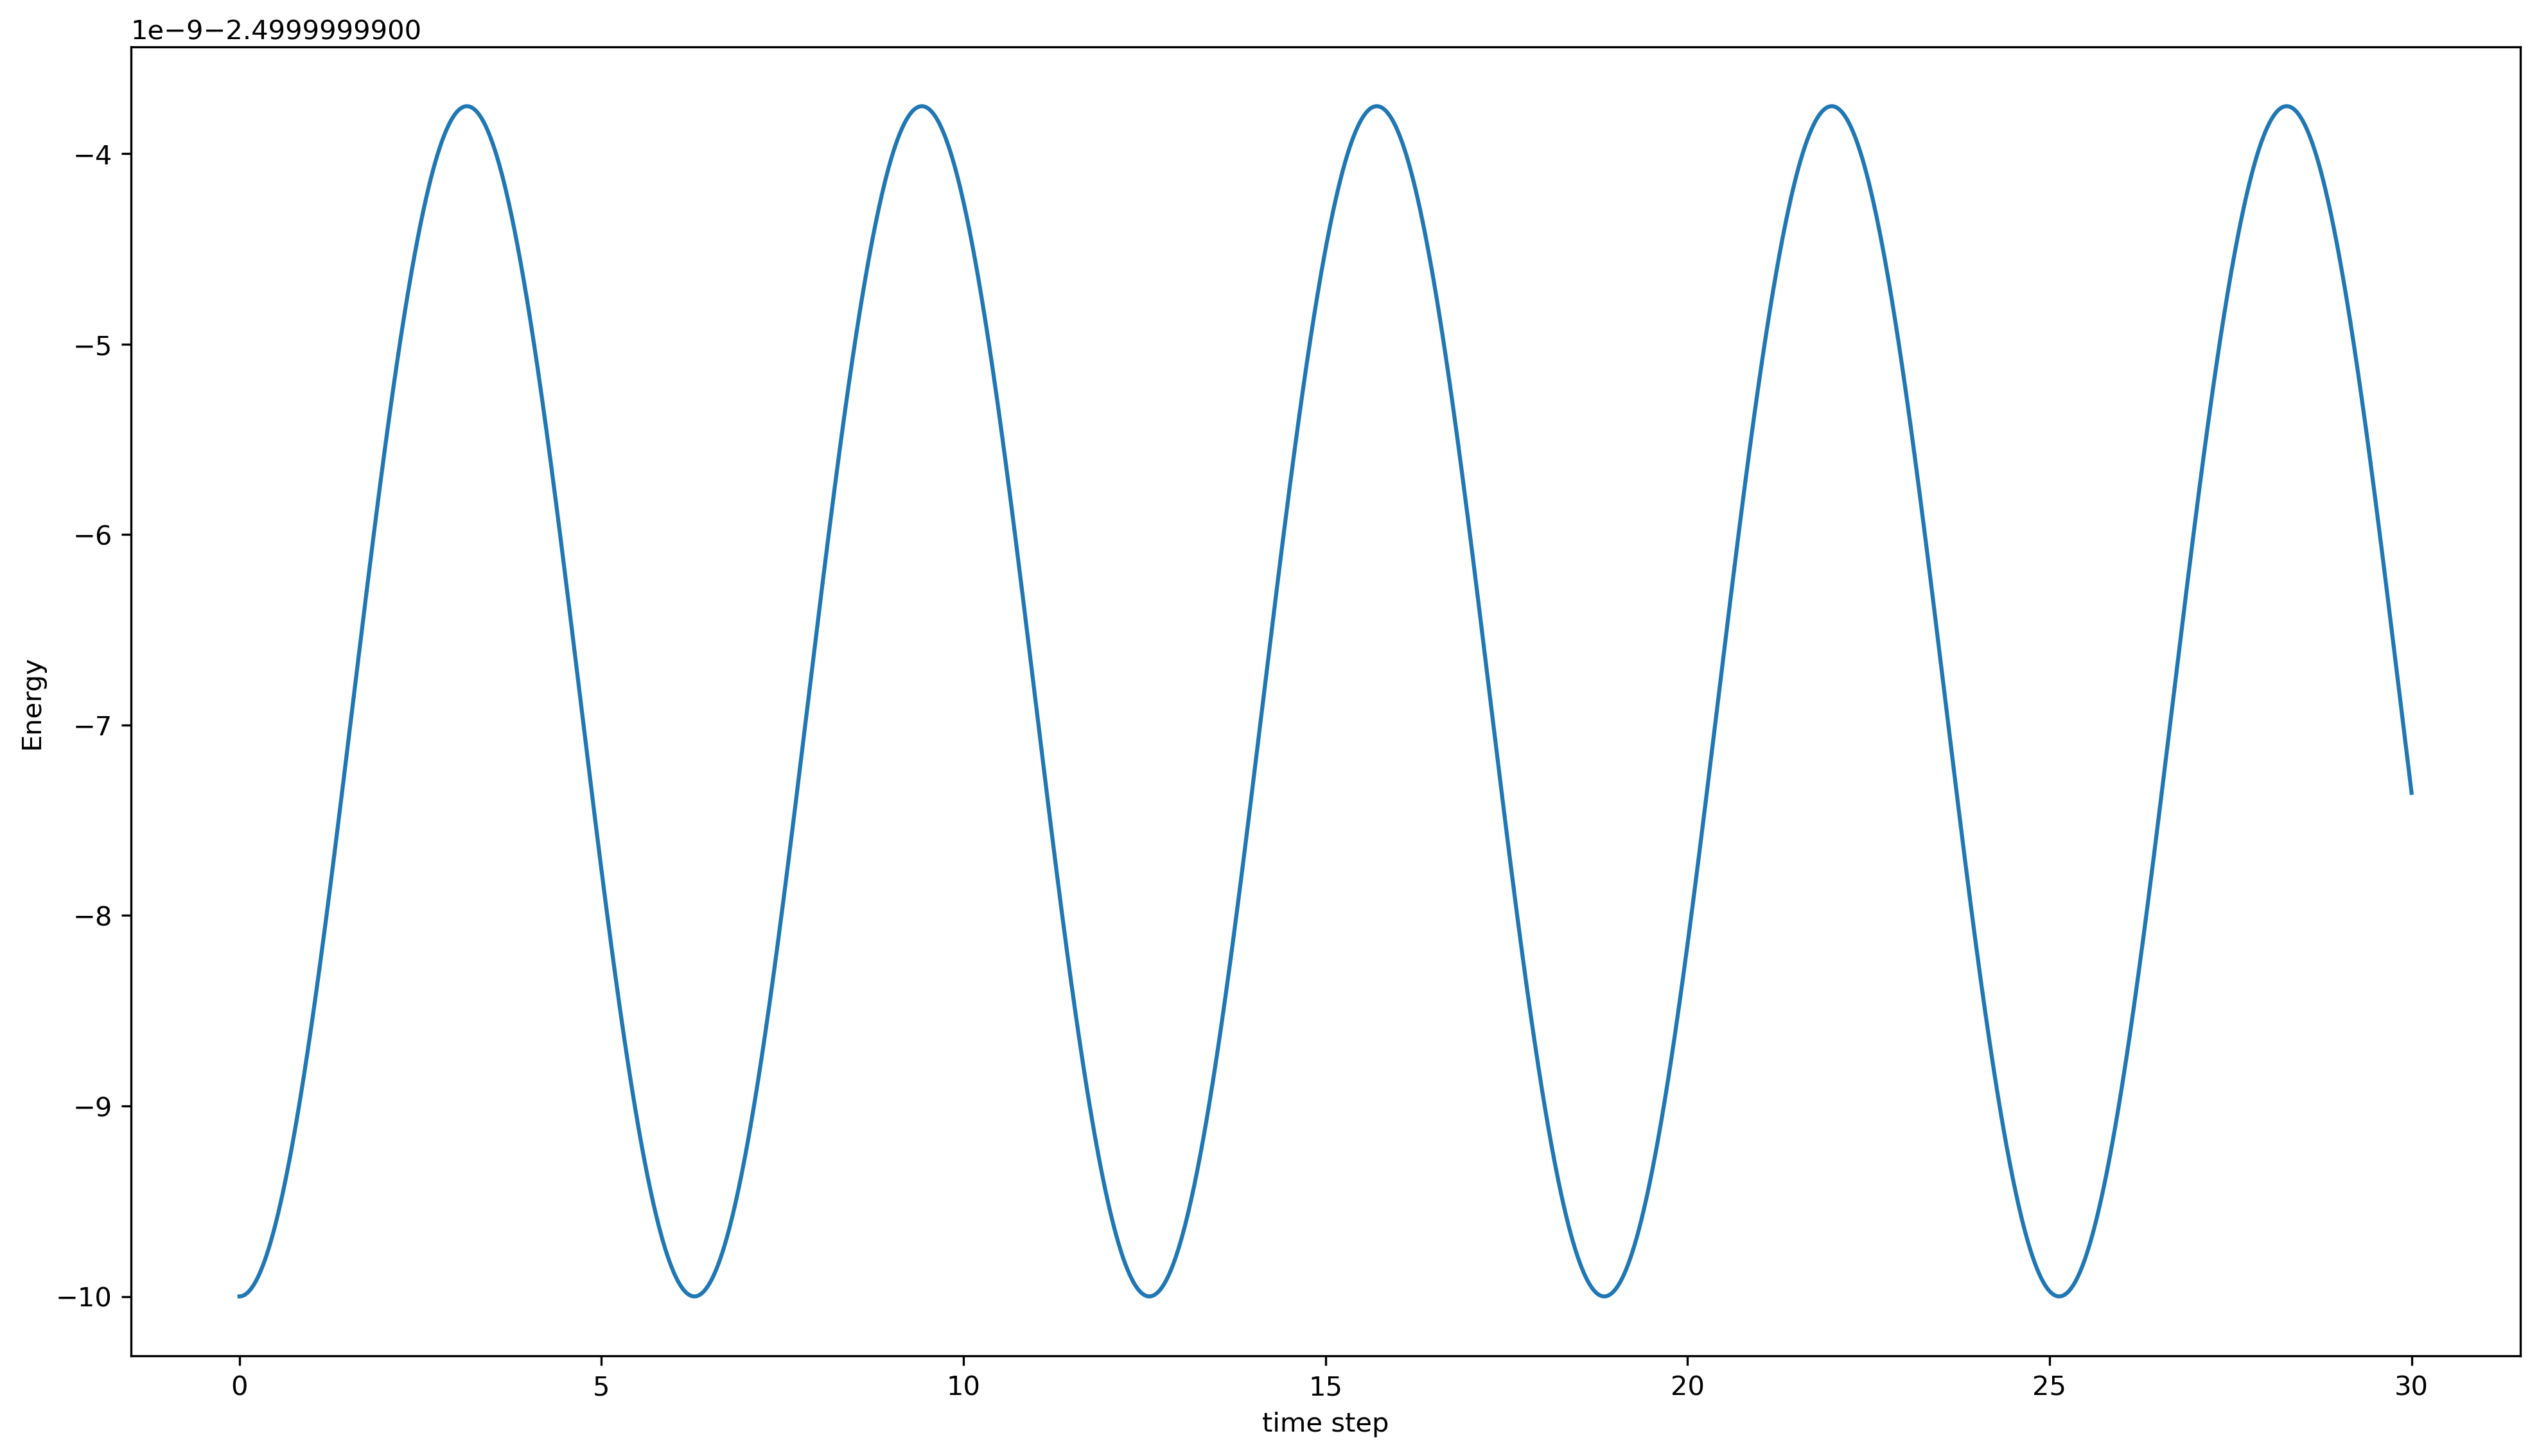

In [19]:
plt.figure(figsize = (16,9), dpi =300)
plt.plot(xval, eng)
plt.xlabel("time step")
plt.ylabel("Energy");

The Energy is conserved by velocity verlet very well. We get oscillations with amplitude in the $10^{-9}$ range, which is minutely small. Theoretically the Stormer-Verlet method should display some oscillations with the expression, 

$$E(t_n) = E_{exp} - A \sin^2(t_n)$$

where $A$ has a linear dependence on mass.

# Q5. Projectile with quadratic Drag

The uncoupled equations are already given to us,

The parameters we chose are,<br>
$v_0 = 10$, $\theta_0 = \pi/3$, $C_d =1$, $M=1$


In [20]:
M2 = 1
Cd = 1
g = 9.8
def proj(t,yv):
    yv = np.asarray(yv)
    modv = np.sqrt(yv[2]**2 + yv[3]**2)
    Y = np.array([yv[2],yv[3],-(Cd/M2)*modv*yv[2],-g - (Cd/M2)*modv*yv[3]])
    return  Y

In [21]:
def rk4(y,x,h,f):
    '''
    Parameters
    ----------
    y : float
        initial value at (n-1) time step
    x : float
        initial value of independent variable
    h : float
        step size
    f : function
        the function on the right hand side of the differential equation using the Runge-Kutta 4 method
    
    Returns
    ---------
    returns the value of y at the next time step using the Runge-Kutta 4 method
    
    '''
    k1 = h*f(x,y)
    k2 = h*f(x+h/2,y+k1/2)
    k3 = h*f(x+h/2,y+k2/2)
    k4 = h*f(x+h,y+k3)
    y_n = y + (k1+2*k2+2*k3+k4)/6
    return y_n
def call(meth,a,b,N,y0,f): # call function Discretizes and generates method
    '''
    Parameters
    ----------
    meth : function
        the numerical method to be used
        'euler' for Euler method
        'midpoint' for Midpoint method
        'rk4' for Runge-Kutta 4 method
    a : float
        start time for differential equation solver
    b : float
        end time for differential equation solver
    N : int
        number of strips for discretization
    y0 : float
        initial value of differential equation solution
    f : function
        the function on the right hand side of the differential equation
    
    Returns
    ---------
    returns the value of y at each time step using the numerical method specified.
        
    '''
    h = (b-a)/(N-1)
    ys = np.zeros((N, len(y0)))
    y,ys[0] = y0,y0
    xs = np.arange(a,b+h/2,h)
    for i in range(N):
        ys[i,:] = y # to allow for vector solutions
        y = meth(y,xs[i],h,f)
    return ys

In [26]:
ti = 0 # t_initial 
tf = 10# t final
h = 0.001# step size
v0 = 10# intial velocity
theta0 = np.pi/3# angle of throw
N2 = int(1+ (tf-ti)/h)
y_ini2 = np.asarray([0.0, 0.0,v0*np.cos(theta0), v0*np.sin(theta0)])  # Initial condition



In [27]:
prk4 = call(rk4,ti,tf,N2,y_ini2, f=proj)
ind = np.where(abs(prk4[:,1][1:])==min(abs(prk4[:,1][1:])))
R = prk4[:,0][ind]# range of projectile
T = ind[0][0]*h + ti # time of flight
R

array([1.27664423])

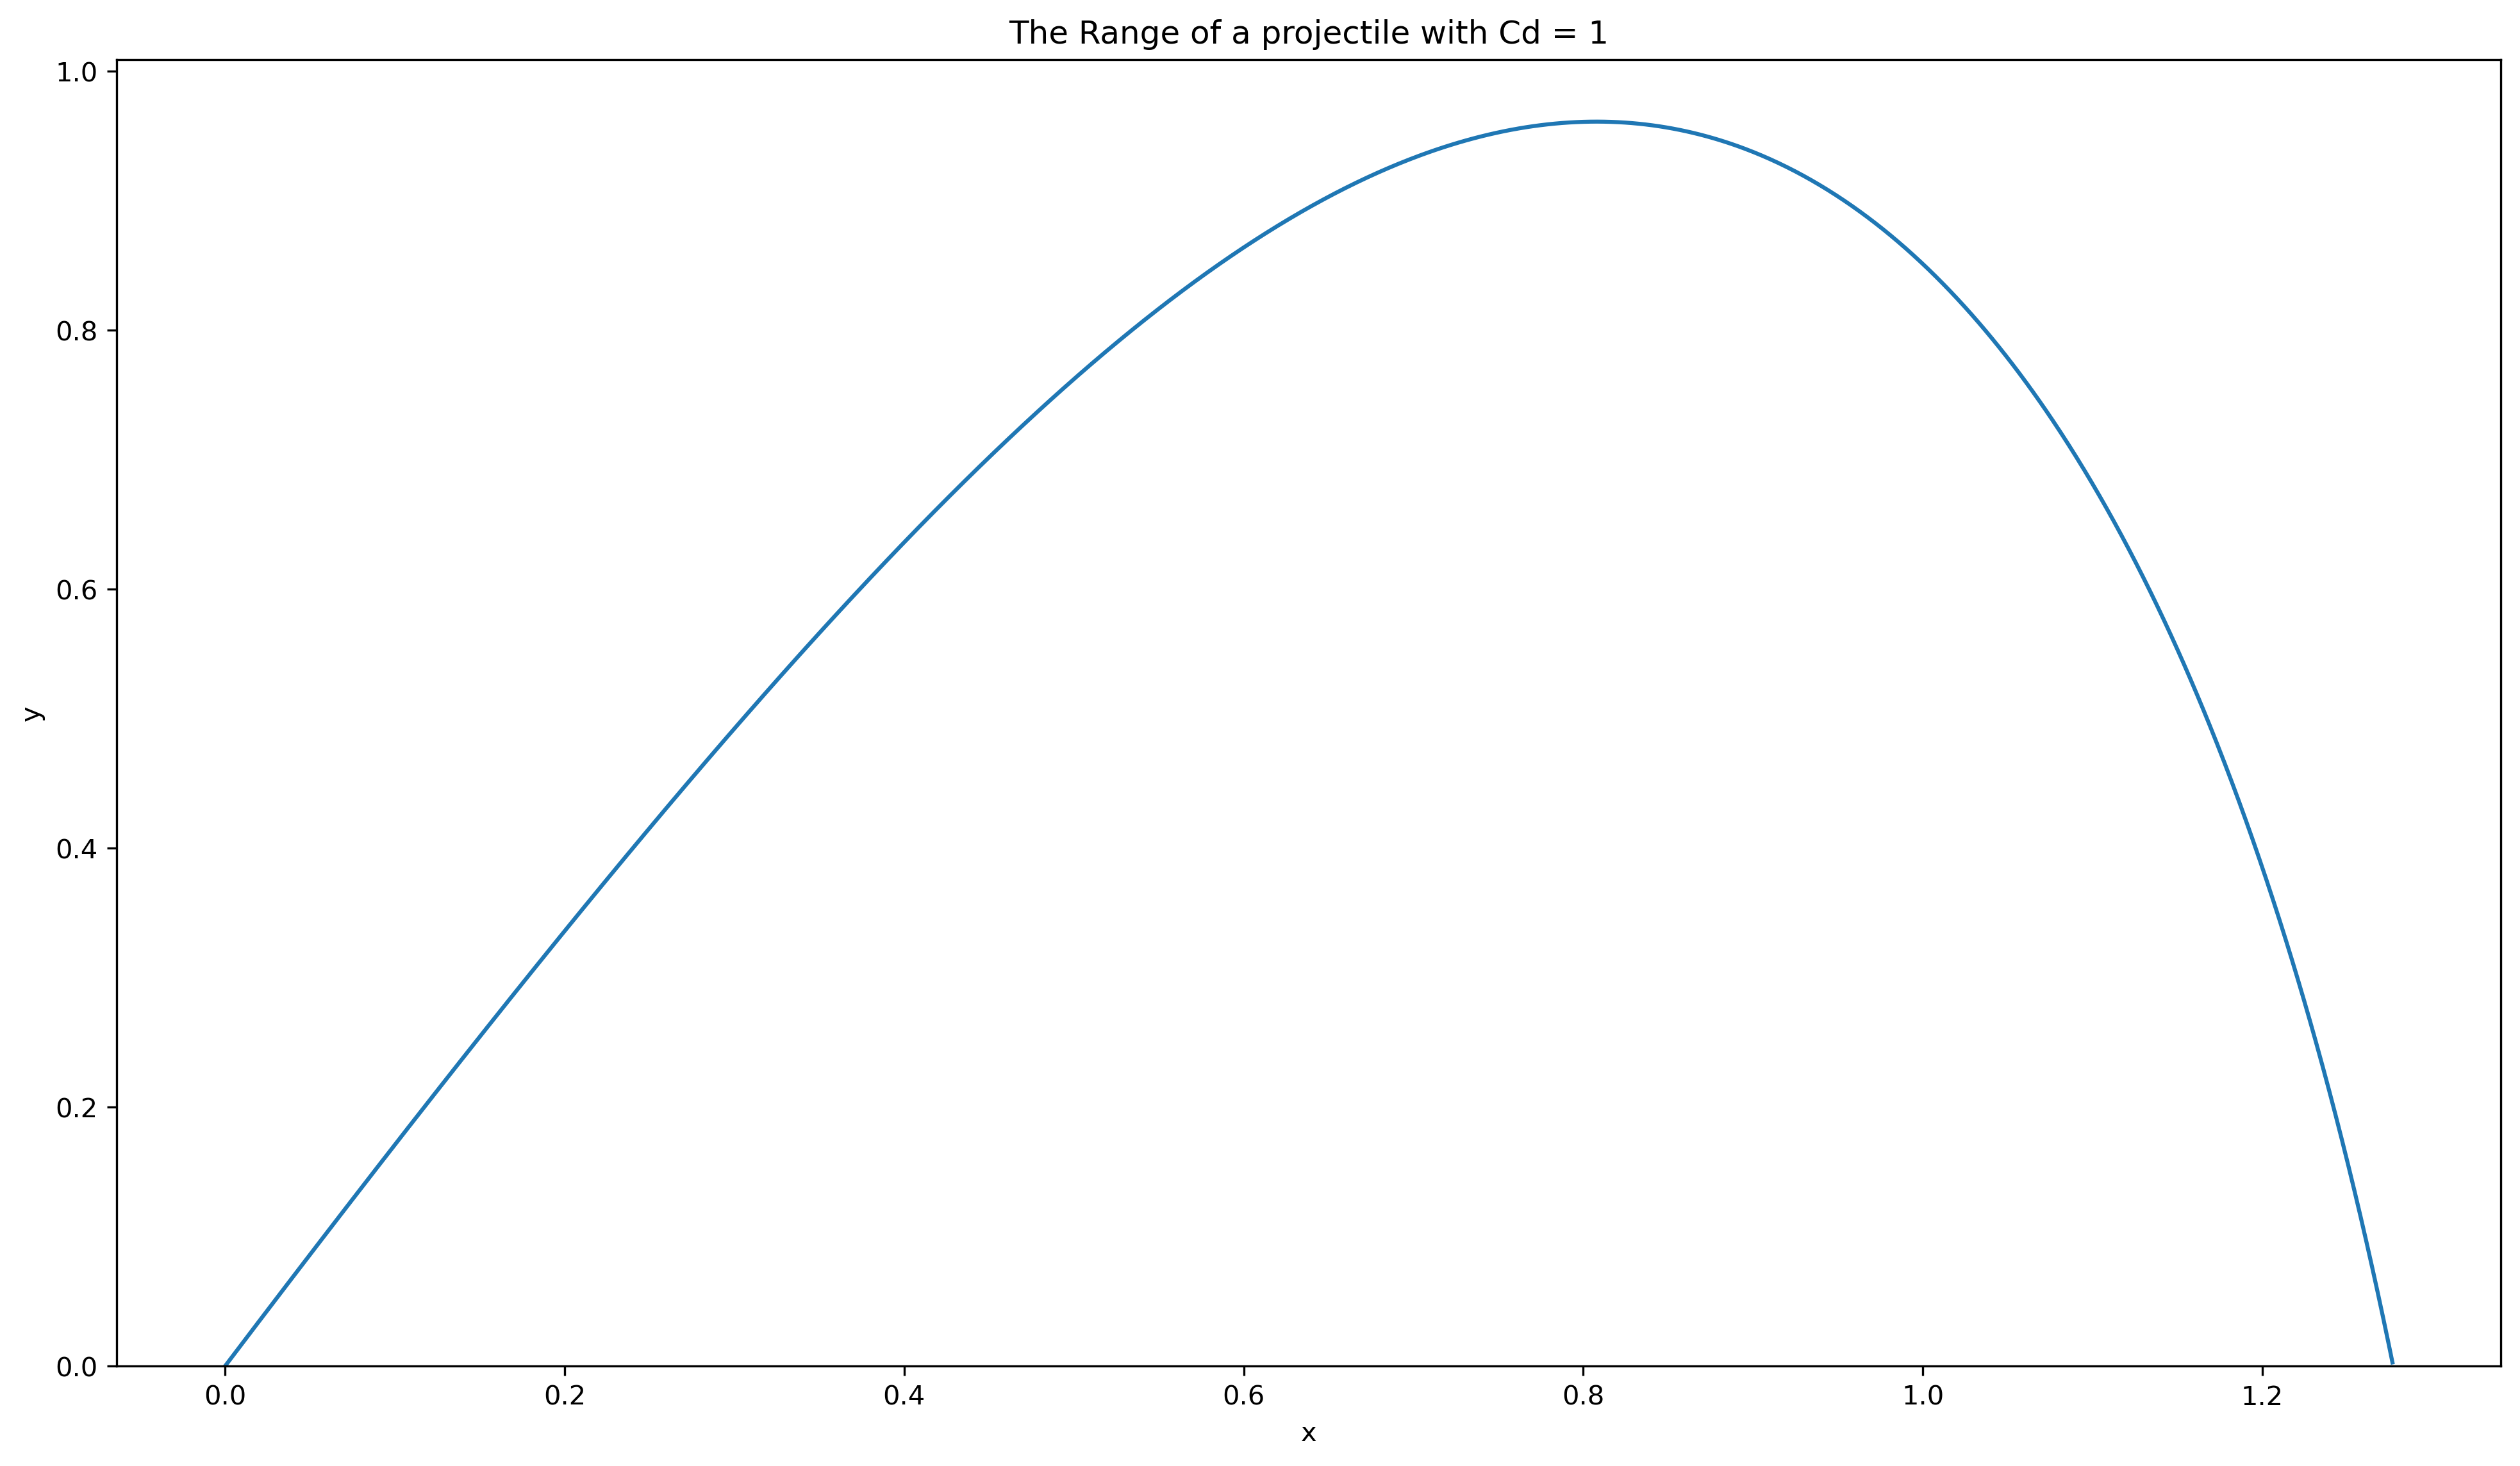

In [28]:
plt.figure(figsize = (16,9), dpi=300)
plt.plot(prk4[:ind[0][0]+1,0], prk4[:ind[0][0]+1,1], label = "RK 4")
plt.ylim(bottom=0);
plt.xlabel("x")
plt.ylabel("y")
plt.title("The Range of a projectile with Cd = "+str(Cd));

In [29]:
print("The range of the projectile is -->",R[0])
print("The flight time is given by -->",T)

The range of the projectile is --> 1.2766442287912483
The flight time is given by --> 0.881
